# Taller
## Métodos multivariados
#### *Sebastián Caamaño, Cristobal Collao, América Suárez*
*09 Diciembre 2021*

### Ejercicio 1.
Con el conjunto de datos salmones.txt realice un anáisis discriminante y responda las preguntas a continuació. Las variables de la base de datos son:

        ° x1: Origen del salmón: Canadá o Alaska.
        ° x2: Diámetro del anillo del salmón durante el primer año de crecimiento en agua fresca (en cientos de pulgadas),
        ° x3: Diámetro del anillo del salmón durante el primer año de crecimiento en agua de mar (en cientos de pulgadas),

In [20]:
library(ggplot2)
library(MVN)
library(biotools)

In [21]:
datos = read.table("Salmones.txt")
datos=as.data.frame(datos)
colnames(datos)=c('Origen','Fresca','Mar')
head(datos)
dim(datos)

,Origen,Fresca,Mar
,<fct>,<int>,<int>
1,Alaska,108,368
2,Alaska,131,355
3,Alaska,105,469
4,Alaska,86,506
5,Alaska,99,402
6,Alaska,87,423


[1] 100   3

###### a) Realice un análisis descriptivo de los datos para verificar los supuestos necesarios para el análisis discriminante. Comente todas las salidas. (10 puntos)

In [22]:
summary(datos[,2:3])
table(datos[,1])

     Fresca           Mar       
 Min.   : 53.0   Min.   :301.0  
 1st Qu.: 99.0   1st Qu.:367.0  
 Median :117.5   Median :396.5  
 Mean   :117.9   Mean   :398.1  
 3rd Qu.:140.0   3rd Qu.:428.2  
 Max.   :179.0   Max.   :511.0  


Alaska Canada 
    50     50 

Se observan que hay 50 salmones provenientes de Alaska y otros 50 provenientes de Canada. Se realizo un resumen estadistico en donde el promedio del diámetro del anillo del salmón durante el primer año de crecimiento en agua fresca es de 117.9 mientras que el promedio del diámetro del anillo del salmón durante el primer año de crecimiento en agua mar es de 398.1.

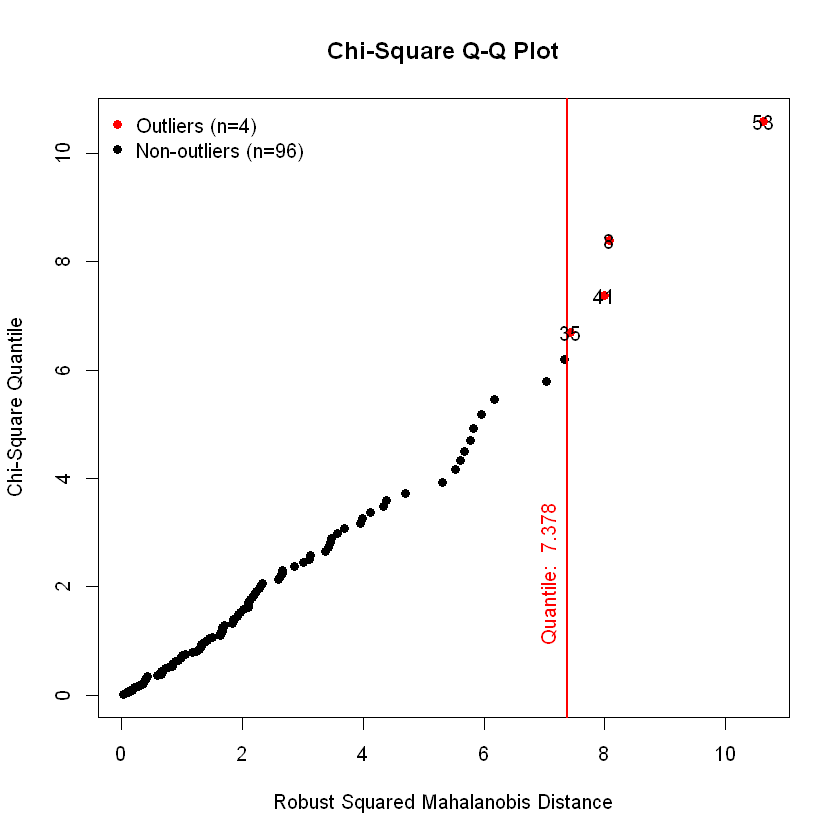

In [23]:
outliers <- mvn(data = datos[,-1], mvnTest = "hz", multivariateOutlierMethod = "quan")

Se chequearon los outliers, donde resulta que la muestra tiene 4 outliers.

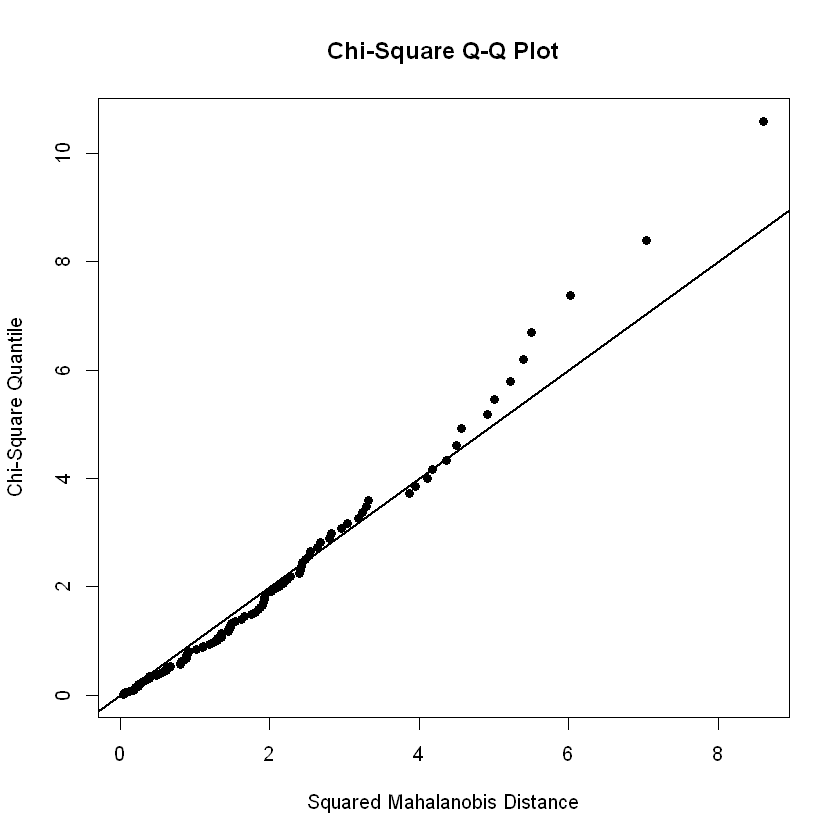

In [24]:
royston_test <- mvn(data = datos[,-1], mvnTest = "royston", multivariatePlot = "qq")

Con el test de royston se chequea la normalidad de los datos multivariados. 

In [25]:
boxM(data = datos[, 2:3], grouping = datos[, 1])


	Box's M-test for Homogeneity of Covariance Matrices

data:  datos[, 2:3]
Chi-Sq (approx.) = 10.696, df = 3, p-value = 0.01349


Test de homogeneidad de covarianzas con un p-value=0.01349

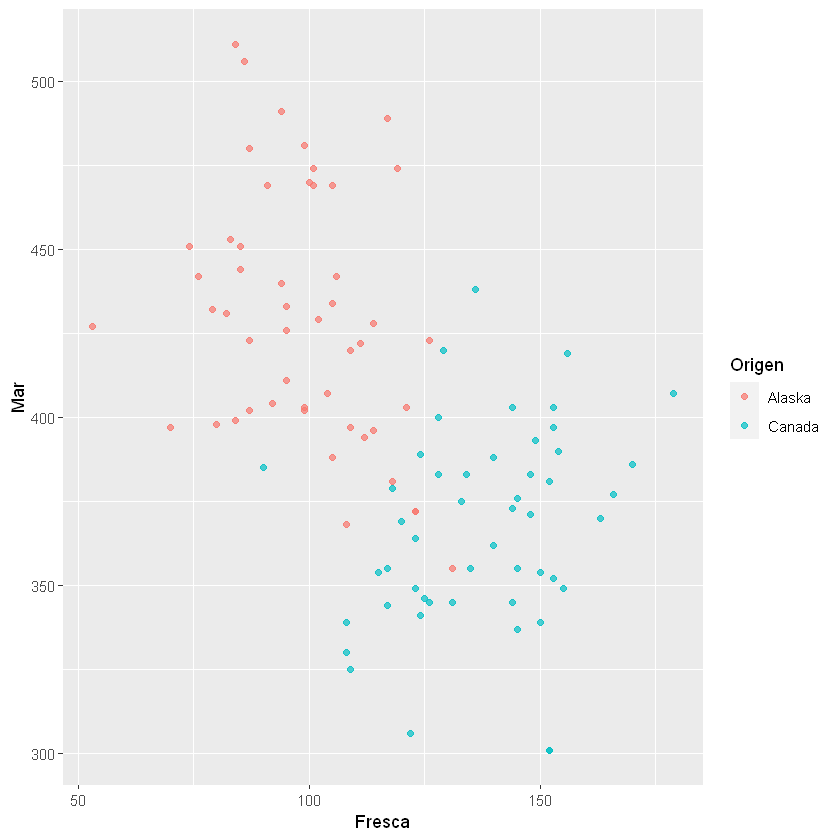

In [26]:
ggplot(datos,aes(x=Fresca,y=Mar)) + geom_point(alpha = 0.7, aes(color = Origen))

Dotplot en donde se clasificaron los salmones.Donde se puede apreciar un punto azul de canada que debiese ser rojo de alaska, y por otro lado tenemos 3 rojos que debiesen ser azules de candada, y ahí tenemos los 4 outliers anteriormente mencionados.

##### (b) Seleccione una submuestra de entrenamiento y otra de test. Según los resultados obtenidos en el item (a) realice un análisis discriminante adecuado sobre la muestra de entrenamiento. Comente las salidas. (5 puntos)

Se separa la muestra en una muestra de entrenamiento y una muestra de testeo para el modelo. Se eligio de manera arbitraria un 70% de la muestra total para el entrenamiento del modelo.

In [27]:
smp_size <- floor(0.7 * nrow(datos))
#set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(datos)), size = smp_size)

train <- datos[train_ind, ]
test <- datos[-train_ind, ]

In [28]:
modelo_qda <- qda(formula = Origen ~ Fresca + Mar, data = train, prior = c(1,1)/2)
modelo_qda

Call:
qda(Origen ~ Fresca + Mar, data = train, prior = c(1, 1)/2)

Prior probabilities of groups:
Alaska Canada 
   0.5    0.5 

Group means:
          Fresca      Mar
Alaska  97.88571 429.3143
Canada 137.51429 361.9714

Entrenamiento del modelo, se observan la medias del diámetro por grupo correspondientes por origen y tipo de agua en el primer año de crecimiento.

##### (c) Realice una matriz de confusión (mal clasificados) sobre la muestra test y estime el error esperado de mal clasificación. Cuál variedad de salmones es mejor clasificado por la regla? (5 puntos)

In [29]:
predicciones <- predict(object = modelo_qda, newdata = test[, -1],
                        method = "predictive")

In [30]:
table(test$Origen, predicciones$class,
      dnn = c("Clase real", "Clase predicha"))

          Clase predicha
Clase real Alaska Canada
    Alaska     14      1
    Canada      0     15

Matriz de confusión para el conjunto de testeo.

In [31]:
t<-table(test$Origen, predicciones$class, dnn = c("Clase real", "Clase predicha"))
round(prop.table(t)*100,1)

          Clase predicha
Clase real Alaska Canada
    Alaska   46.7    3.3
    Canada    0.0   50.0

In [32]:
trainig_error <- round(mean(test$Origen != predicciones$class) * 100,1)
paste("trainig_error=", trainig_error, "%")

[1] "trainig_error= 3.3 %"

El error de mala clasificación es de un 6.7% y podemos ver que el modelo clasifica mejor los salmones de Canada que los de origen en Alaska.

##### (d) Grafique los grupos y los resultados de la clasificación. Comente. (5 puntos)

In [33]:
predicciones <- predict(object = modelo_qda, newdata = datos[, -1],
                        method = "predictive")
predicciones$class

[1] Alaska Canada Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska
 [11] Alaska Canada Canada Alaska Alaska Alaska Alaska Alaska Alaska Alaska
 [21] Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Canada
 [31] Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska
 [41] Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska Alaska
 [51] Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada
 [61] Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada
 [71] Alaska Canada Canada Canada Canada Canada Canada Canada Canada Canada
 [81] Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada
 [91] Canada Canada Canada Canada Canada Canada Canada Canada Canada Canada
Levels: Alaska Canada

In [34]:
datos_predict<-data.frame(datos,predicciones$class)
colnames(datos_predict)<-c("Origen","Fresca","Mar","Predict")

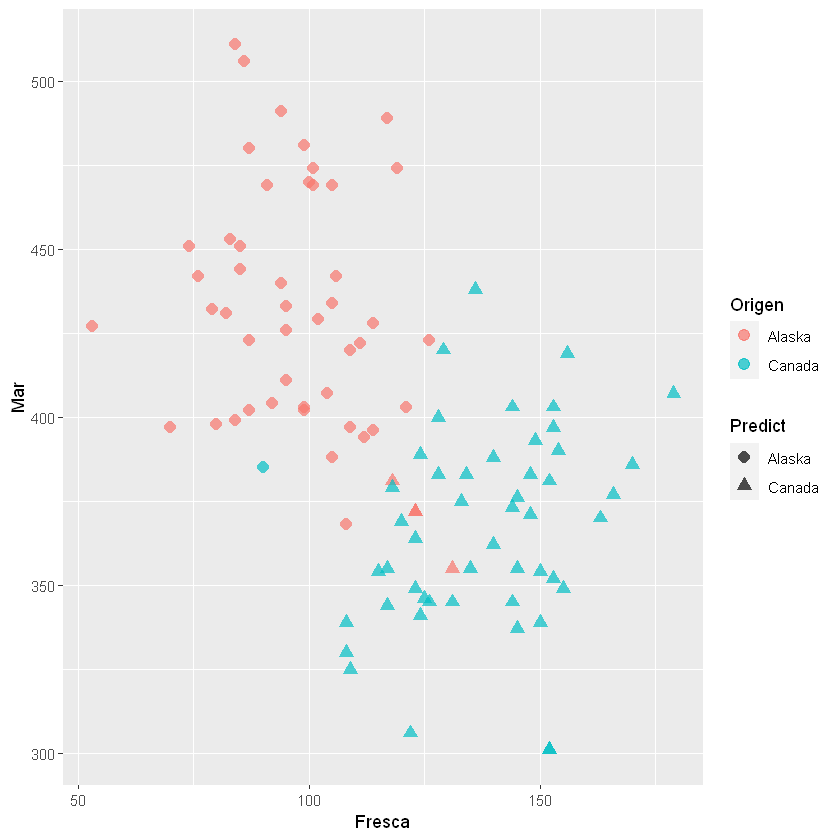

In [36]:
ggplot(data = datos_predict, aes(x = Fresca, y = Mar)) + geom_point(alpha = 0.7, aes(color = Origen, shape = Predict),size=3)

In [37]:
predicciones <- predict(object = modelo_qda, newdata = datos[, -1],
                        method = "predictive")
table(datos$Origen, predicciones$class,
      dnn = c("Clase real", "Clase predicha"))

          Clase predicha
Clase real Alaska Canada
    Alaska     46      4
    Canada      1     49

Podemos apreciar en dotplot que los colores son las categorias originales y las formas son las predicciones, como podemos ver hay 6 casos que predicen mal.

##### (e) Clasifique una nueva observación: (110, 400), de dónde supone que proviene este salmón? (5 puntos)

In [45]:
nuevas_observaciones <- data.frame(Fresca = 110, Mar = 400)
predict(object = modelo_qda, newdata = nuevas_observaciones)

,Alaska,Canada
1,0.8676084,0.1323916


Agregando el nuevo caso nuestro modelo predice que el salmón sería procedente de Alaska.

### Ejercicio 2.
Utilice la base de datos wine disponible en R, Datos de reconocimiento del vino, de 178 filas y 14 columnas para clasificar las calificaciones a partir de degustaciones según 13 características (variables 2 a 14). Estos datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia pero procedentes de tres lugares diferentes. El análisis determinó las cantidades de 13 componentes encontrados en cada uno de los tres tipos de vinos (variable 1).

El conjunto de datos inicial tenía unas 30 variables, pero por alguna razón sólo se puede obtener la versión de 13 variables.
Los atributos son (donados por Riccardo Leardi, riclea@anchem.unige.it ) 1) Alcohol 2)Acido málico 3) Ceniza 4) Alcalinidad de la ceniza 5) Magnesio 6) Fenoles totales 7)Flavanoides 8) Fenoles no flavonoides 9) Proantocianinas 10)Intensidad del color 11)Tono 12)DO280/OD315 de los vinos diluidos 13)Prolina

In [46]:
library("cluster")
library("factoextra")
library("rattle.data")
library(reshape)
library(ggplot2)
library(MASS)
#cargar las bases de datos
data(wine)
head(wine)
dim(wine)

Warning message:
"package 'factoextra' was built under R version 3.6.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'rattle.data' was built under R version 3.6.3"
Warning message:
"package 'reshape' was built under R version 3.6.3"


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


[1] 178  14

##### (a) Utilice el método de Ward para realizar un agrupamiento de las 178 calificaciones de los vinos. Presente el dendograma. Determine la cantidad de grupos más conveniente. Justifique la elección del agrupamiento. Determine los miembros de cada grupo. (8 puntos)

In [47]:
data<-wine[, 2:14]

In [48]:
library(cluster)
library(purrr)
library("rattle.data")
library(stats)

Warning message:
"package 'purrr' was built under R version 3.6.3"


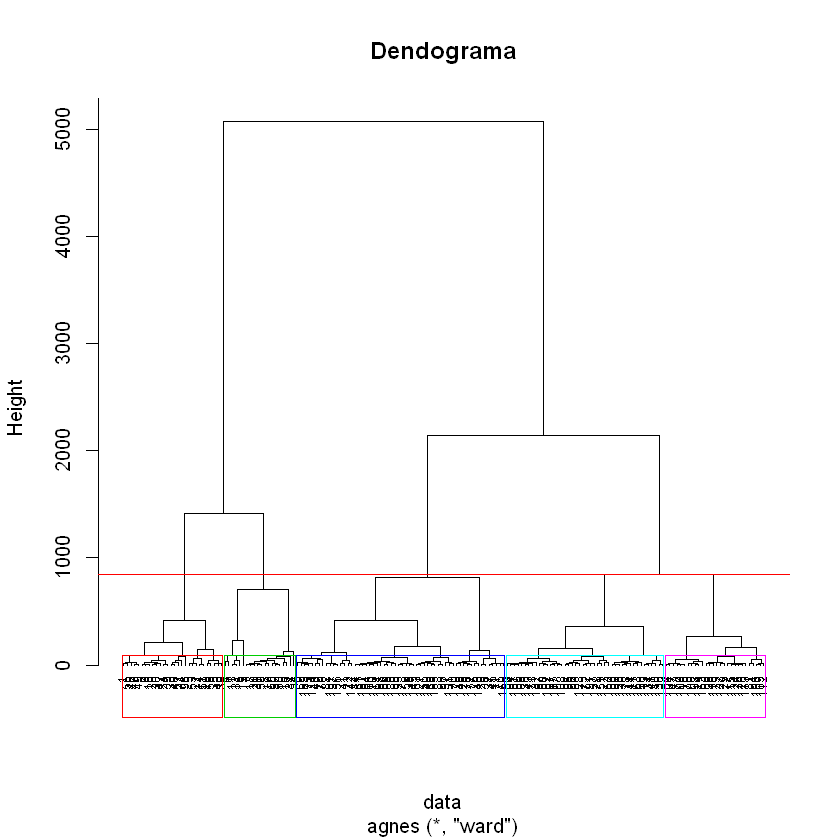

In [49]:
hc5 <- agnes(data, method = "ward")
pltree(hc5, cex = 0.6, hang = -1, main = "Dendograma") 
abline(h=850, col='red')   #5
rect.hclust(hc5, k = 5, border = 2:30)

In [50]:
clases<-cutree(hc5,k=3)

Se realiza el dendograma utilizando el método de ward, en el cual se tomo la decisión de determinar la cantidad de grupos de 5. Los cuales se pueden observar separados a la altura de la linea roja, y con los miembros de cada uno de estos en las cuadriculas que se aprecian en el eje x. 

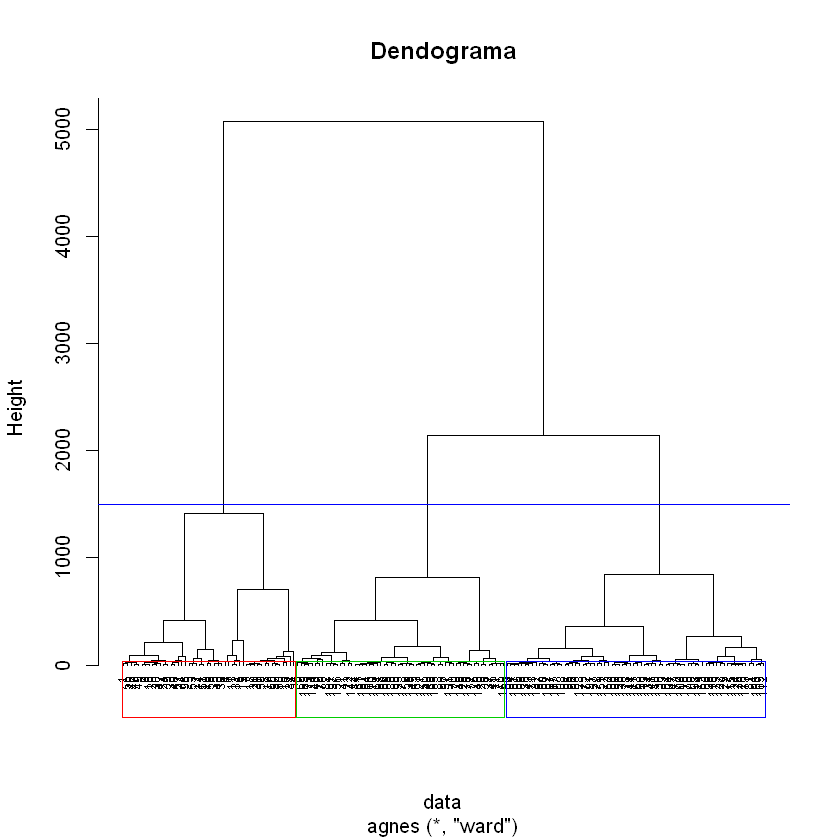

In [51]:
hc3 <- agnes(data, method = "ward")
pltree(hc3, cex = 0.6, hang = -1, main = "Dendograma") 
abline(h=1500, col='blue') #3
rect.hclust(hc3, k = 3, border = 2:10)

Se realiza el mismo dendograma utilizando el método de ward, en el cual se tomo la decisión de determinar la cantidad de grupos de 3, esto es netamente porque ya sabemos que son tres tipos de variedades de vinos lo cual se puede observar en la columna Type. Los cuales se pueden observar separados a la altura de la linea azul, y con los miembros de cada uno de estos en las cuadriculas que se aprecian en el eje x. 

K-means clustering with 3 clusters of sizes 69, 47, 62

Cluster means:
   Alcohol    Malic      Ash Alcalinity Magnesium  Phenols Flavanoids
1 12.51667 2.494203 2.288551   20.82319  92.34783 2.070725   1.758406
2 13.80447 1.883404 2.426170   17.02340 105.51064 2.867234   3.014255
3 12.92984 2.504032 2.408065   19.89032 103.59677 2.111129   1.584032
  Nonflavanoids Proanthocyanins    Color       Hue Dilution   Proline
1     0.3901449        1.451884 4.086957 0.9411594 2.490725  458.2319
2     0.2853191        1.910426 5.702553 1.0782979 3.114043 1195.1489
3     0.3883871        1.503387 5.650323 0.8839677 2.365484  728.3387

Clustering vector:
  [1] 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 3 3 2 2 3 2 2 2 2 2 2 3 3
 [38] 2 2 3 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 3 1 1 3 1 1 3 3 3 1 1 2
 [75] 3 1 1 1 3 1 1 3 3 1 1 1 1 1 3 3 1 1 1 1 1 3 3 1 3 1 3 1 1 1 3 1 1 1 1 3 1
[112] 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 3 3 3 3 1 1 1 3 3 1 1 3 3 1 3
[149] 3 1 1 1 1 3 3 3 1 3 3 3

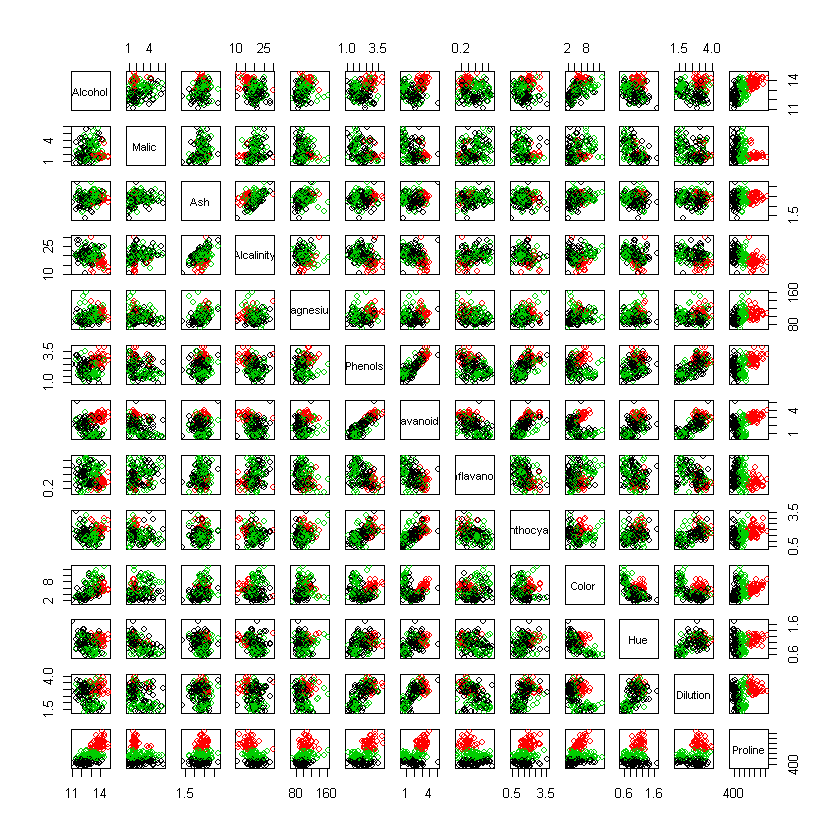

In [52]:
Ck4=kmeans(data, 3, nstart = 178)
Ck4
plot(data, col = Ck4$cluster)
points(Ck4$centers, col = Ck4$cluster, pch = 2)

Se realizo un agrupamiento en 3 grupos, donde el grupo 1 contendrá 69 miembros, grupo 2 con 62 miembros y el grupo 3 con 47 miembros. Luego se observan las medias por variable según cada grupo. Posterior a eso tenemos el vector con la agrupación, es decir que se los números que se encuentran en el vector corresponden a el grupo del cual son miembros dada la asignación. A continuación observamos la suma de cuadrados por grupo dentro del grupo, el 86.5% corresponde a la suma de cuadrado entre grupos dividido por la suma de cuadrados total. Observando el gráfico con respecto a la variable Proline se puede separar uno o dos grupos, rojo y verde, para asegurarnos de esto debemos hacer un acercamiento para poder observar mejor, ya que a simple vista se ve que los podriamos separar, pero a detalle puede que esten mezclados.

##### (b) Realice un agrupamiento utilizando el método de K-medias, justifique la elección de k, el número de grupos. Determine los miembros de cada grupo. (8 puntos)

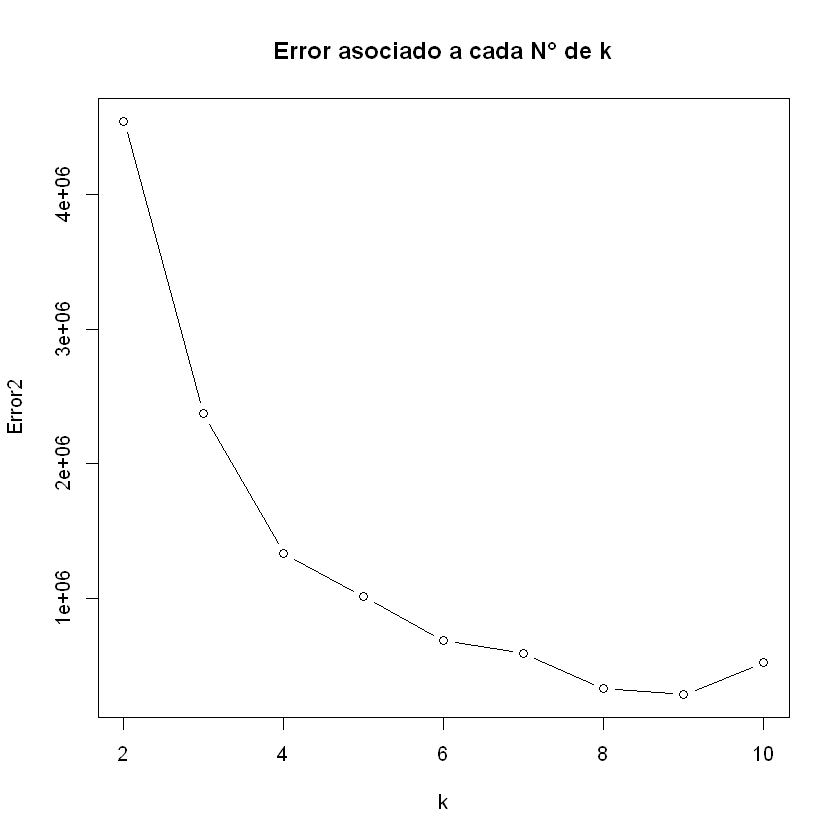

In [53]:
Error<-rep(0,9)
Error2<-rep(0,9)
K=10
for(k in 2:K){
Error[k-1]=kmeans(data,k)$betweenss/kmeans(data,k)$tot.withinss
Error2[k-1]=kmeans(data,k)$tot.withinss
}
plot(2:10,Error2,type='b',main = "Error asociado a cada N° de k",xlab = "k") # Nos quedamos con k=3

Se realizo un agrupamiento por el método de K-medias, observando el gráfico anterior se puede notar la cantidad de grupos a elegir, el criterio para esto es observar el punto en que se nota la mayor asociación de grupos, es decir el cambio más significativo, el cual lo definimos en el punto tres, por ende escojeremos un k=3 grupos.

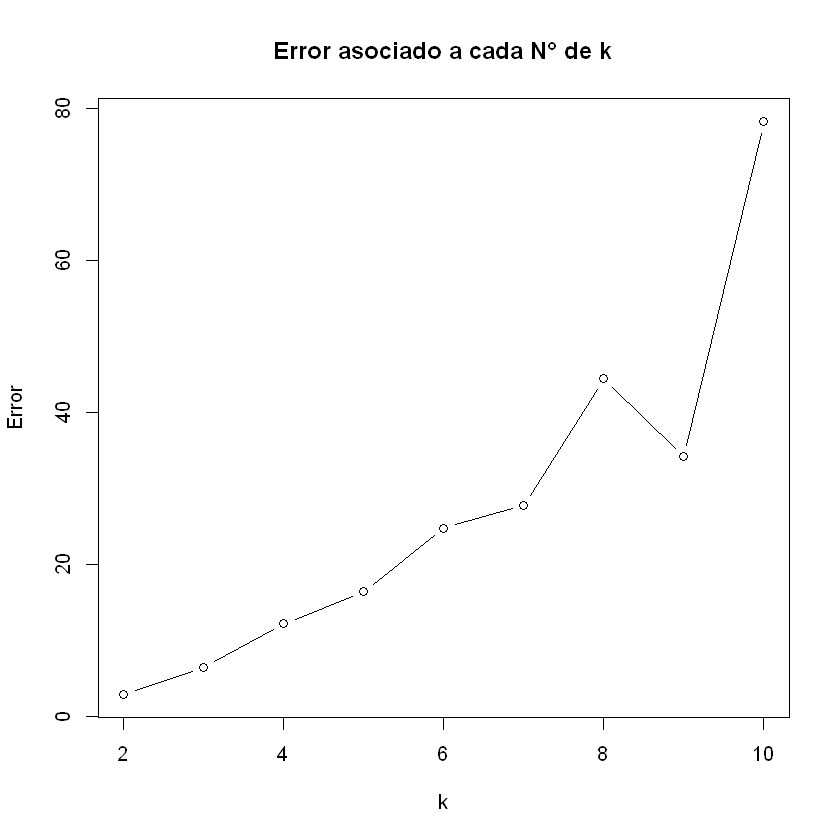

In [54]:
plot(2:10,Error,type='b',main = "Error asociado a cada N° de k",xlab = "k") # Nos quedamos con k=3

En este gráfico el criterio es el mismo que el anterior 

In [55]:
Ck2=kmeans(data,6, nstart = 178)
Ck2

K-means clustering with 6 clusters of sizes 57, 17, 48, 24, 26, 6

Cluster means:
   Alcohol    Malic      Ash Alcalinity Magnesium  Phenols Flavanoids
1 12.47509 2.325263 2.280000   20.63684   91.7193 2.105789   1.871404
2 13.76235 1.780588 2.540588   17.35882  105.4118 2.832941   2.975882
3 12.74167 2.683542 2.364167   20.61250   97.1250 1.966875   1.328333
4 13.75125 1.969167 2.348750   16.97500  105.0417 2.794583   2.921667
5 13.17769 2.538462 2.452692   19.39615  111.7308 2.281923   1.888846
6 14.13667 1.831667 2.411667   16.26667  107.6667 3.255000   3.493333
  Nonflavanoids Proanthocyanins    Color       Hue Dilution   Proline
1     0.3833333        1.468421 3.952105 0.9605263 2.544386  435.5789
2     0.3082353        1.823529 5.916471 1.0952941 3.038235 1270.8824
3     0.4129167        1.385625 5.541875 0.8645833 2.188750  636.1250
4     0.2725000        1.895417 5.168333 1.0575000 3.189167 1057.7083
5     0.3588462        1.660769 5.424615 0.9036923 2.631923  823.5769
6     0.

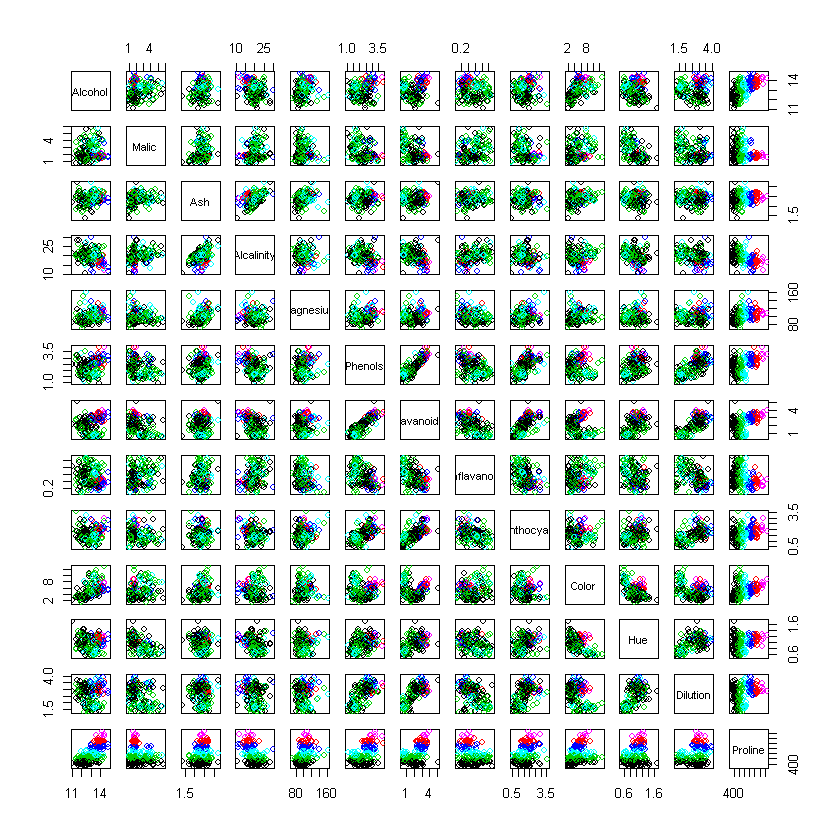

In [56]:
plot(data, col = Ck2$cluster)
points(Ck2$centers, col = 1:2, pch = 8)

##### (c) Compare las clasificaciones obtenidas en los ítems (a) y (b) con la variedad de vino dada en la variable 1 (etiquetas: 1,2,3) utilizando análisis descriptivo. Presente sus conclusiones. (8 puntos)

In [57]:
table(wine$Type, clases, dnn = c("Clase real", "Clase predicha"))


          Clase predicha
Clase real  1  2  3
         1 46 13  0
         2  2 18 51
         3  0 27 21

In [58]:
length((wine$Type == clases)[(wine$Type == clases)==TRUE])/178

[1] 0.4775281

In [59]:
clases1<-replace(Ck4$cluster, Ck4$cluster == 2,4)
clases1<-replace(clases1, clases1 == 1,2)
clases1<-replace(clases1,clases1 == 4,1)
clases1

[1] 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 1 1 3 3 1 1 3 1 1 1 1 1 1 3 3
 [38] 1 1 3 3 1 1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 3 2 2 3 2 2 3 3 3 2 2 1
 [75] 3 2 2 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 2 2 3 3 2 3 2 3 2 2 2 3 2 2 2 2 3 2
[112] 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 3 3 3 3 2 2 2 3 3 2 2 3 3 2 3
[149] 3 2 2 2 2 3 3 3 2 3 3 3 2 3 2 3 3 2 3 3 3 3 2 2 3 3 3 3 3 2

In [60]:
table(wine$Type, clases1, dnn = c("Clase real", "Clase predicha"))


          Clase predicha
Clase real  1  2  3
         1 46  0 13
         2  1 50 20
         3  0 19 29

In [61]:
length((wine$Type == clases1)[(wine$Type == clases1)== TRUE]) /178

[1] 0.7022472

##### (d) Presente el script del taller. (6 puntos)